In [3]:
import time
import re
import bisect

import numpy as np

from dasly.das_master import Dasly
from dasly.simpledas import simpleDASreader
from dasly import das_loader

In [1]:
folder_path = '/mnt/Datastore/usr/kptruong/dasly_repo/data/svalbard'
# start = '20220822 122539'
start = '20220822 120859'
duration = 10000

In [4]:
paths = das_loader.get_file_paths(folder_path, start, duration)
i = 19 * 3

61 files, from 20220822 120859 to 20220822 122959


In [5]:
paths[i: i+3]

['/mnt/Datastore/usr/kptruong/dasly_repo/data/svalbard/20220822/dphi/122929.hdf5',
 '/mnt/Datastore/usr/kptruong/dasly_repo/data/svalbard/20220822/dphi/122939.hdf5',
 '/mnt/Datastore/usr/kptruong/dasly_repo/data/svalbard/20220822/dphi/122949.hdf5']

i=5 FP

i=6 FN

i=6 FN, FP

i=7 FN

i=8 FN

i=9 ok

i=10 ok

i=11 FN

i=12 ok

i=13 ok

i=14 ok

i=15 ok

i=16 ok

i=17 FN

i=18 ok

i=19 ok


In [6]:
s_rate = 0.25
das = Dasly()
das.load_data(
    file_paths=paths[i: i+3],
    # start=start,
    # duration=duration,
    # start_exact_second=False,
    integrate=True,
    chIndex=np.arange(round(5000 * s_rate), round(85000 * s_rate)),
    reset_channel_idx=False
)

In [7]:
das.signal

,5000,5004,5008,5012,5016,5020,5024,5028,5032,5036,...,84960,84964,84968,84972,84976,84980,84984,84988,84992,84996
2022-08-22 12:29:29.000000,-5.314275e-10,-6.016160e-11,3.810235e-10,7.018854e-11,-4.010774e-11,3.760101e-10,2.506733e-10,-7.520201e-11,-2.657138e-10,-3.308888e-10,...,-5.665218e-10,6.216699e-10,7.419931e-10,8.322356e-10,5.264141e-10,1.002693e-11,-9.525588e-10,-3.459292e-10,6.467373e-10,7.570335e-10
2022-08-22 12:29:29.001600,-8.472760e-10,1.153097e-10,4.812928e-10,-2.155791e-10,-5.414545e-10,4.211312e-10,4.311582e-10,-5.214006e-10,-4.411851e-10,-6.016160e-11,...,-6.116430e-10,4.863063e-10,4.111043e-10,4.762794e-10,-2.306195e-10,-3.609696e-10,-1.303501e-10,6.016160e-11,7.821008e-10,8.573029e-10
2022-08-22 12:29:29.003200,-3.910505e-10,1.453905e-10,3.960639e-10,2.406464e-10,4.411851e-10,6.116430e-10,2.957946e-10,-2.506736e-11,-4.612390e-10,-5.113737e-10,...,-1.378703e-09,-6.066295e-10,1.223286e-09,1.975306e-09,5.364409e-10,5.665218e-10,-3.058215e-10,-6.166565e-10,1.338596e-09,1.168138e-09
2022-08-22 12:29:29.004800,-4.211313e-10,-4.461986e-10,2.607003e-10,4.060908e-10,6.868450e-10,8.974106e-10,3.860370e-10,1.453905e-10,-4.662524e-10,-6.968719e-10,...,-3.659830e-10,3.308889e-10,-2.205926e-10,9.274914e-10,1.158111e-09,3.609696e-10,-8.923972e-10,1.854983e-10,1.639404e-09,-9.024242e-11
2022-08-22 12:29:29.006400,-3.609697e-10,-1.353636e-10,2.657138e-10,1.955252e-10,2.807542e-10,5.665218e-10,2.607003e-10,-1.002694e-10,-5.414545e-10,-6.216699e-10,...,-1.032774e-09,-1.584256e-09,7.269527e-10,9.826395e-10,3.258753e-10,2.205925e-10,-2.556868e-10,3.760100e-10,7.419932e-10,3.910504e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-22 12:29:58.992000,-4.812944e-09,-2.135694e-09,6.301897e-09,7.475049e-09,6.703045e-09,1.122510e-08,3.510508e-10,-1.596268e-08,-2.515245e-08,-1.429332e-08,...,2.632076e-08,-1.180673e-08,-2.750386e-08,2.251054e-09,1.538131e-08,6.908581e-09,-1.428820e-09,-4.562280e-10,5.680245e-09,1.785293e-08
2022-08-22 12:29:58.993600,-4.627446e-09,-2.085559e-09,6.106372e-09,7.304591e-09,6.637870e-09,1.121006e-08,-1.001612e-10,-1.651416e-08,-2.480652e-08,-1.377693e-08,...,2.807547e-08,-1.037288e-08,-2.846644e-08,1.524102e-09,1.527101e-08,6.823352e-09,-1.714587e-09,-1.097952e-09,5.304235e-09,1.723627e-08
2022-08-22 12:29:58.995200,-4.632459e-09,-1.885021e-09,6.111385e-09,7.134133e-09,6.387196e-09,1.109475e-08,8.533706e-11,-1.635373e-08,-2.479148e-08,-1.373181e-08,...,2.674189e-08,-1.145579e-08,-2.708774e-08,2.085610e-09,1.457915e-08,6.477423e-09,-1.298470e-09,-1.855008e-10,6.156525e-09,1.739670e-08
2022-08-22 12:29:58.996800,-5.108739e-09,-2.571866e-09,6.241736e-09,7.575318e-09,6.828381e-09,1.149583e-08,6.919666e-10,-1.545632e-08,-2.512738e-08,-1.451892e-08,...,2.729838e-08,-1.060852e-08,-2.745874e-08,1.694560e-09,1.523592e-08,7.174295e-09,-9.525404e-10,4.662499e-10,6.647844e-09,1.822392e-08


In [6]:
start_time = time.time()
das.bandpass_filter(15, 25)
time_bandpass = time.time()
print(f'time_bandpass: {time_bandpass - start_time}')

Signal updated with band-pass filter.


time_bandpass: 12.443321466445923


vmin: -2.02e-10, vmax: 2.02e-10


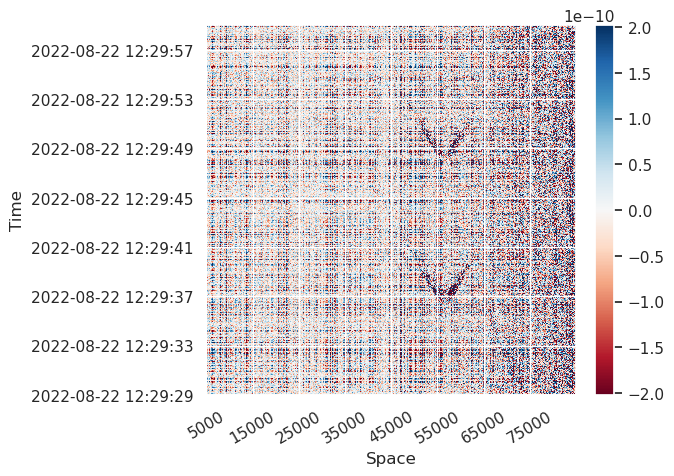

In [7]:
das.heatmap(xticks_rotate=30)

In [8]:
start_time = time.time()
das.signal = np.abs(das.signal)
time_abs = time.time()
print(f'time_abs: {time_abs - start_time}')

das.sample(meters=100, seconds=1/25)
time_sample = time.time()
print(f'time_sample: {time_sample - time_abs}')


das.gaussian_smooth(-1500.01, -1500, unit='m/s', std_s=500)
time_gauss = time.time()
print(f'time_gauss: {time_gauss - time_sample}')


das.sobel_filter(pos_grads=True)
time_sobel = time.time()
print(f'time_sobel: {time_sobel - time_gauss}')

das.binary_transform(threshold=2.5e-11)
time_binary = time.time()
print(f'time_binary: {time_binary - time_sobel}')

time_abs: 0.658501386642456


Signal updated with new temporal sampling rate 25 and new spatial sampling rate 0.010.
Signal updated with Gaussian smoothing.
Signal updated with Sobel filter.
Signal updated with binary transform with threshold 2.5e-11.


time_sample: 2.7424376010894775
time_gauss: 0.013305187225341797
time_sobel: 0.021030664443969727
time_binary: 0.0028769969940185547


In [9]:
das.hough_transform(
    target_speed=(1500+1500.01)/2,
    speed_res=100,
    length_meters=3500,
    threshold_percent=0.8,
    max_line_gap_percent=0.1,
    speed_unit='m/s',
)
time_hough = time.time()
print(f'time_hough: {time_hough - time_binary}')

das.dbscan(eps_seconds=3)
time_dbscan = time.time()
print(f'time_dbscan: {time_dbscan - time_hough}')

13 lines are detected.


time_hough: 0.02269887924194336
time_dbscan: 0.01347804069519043


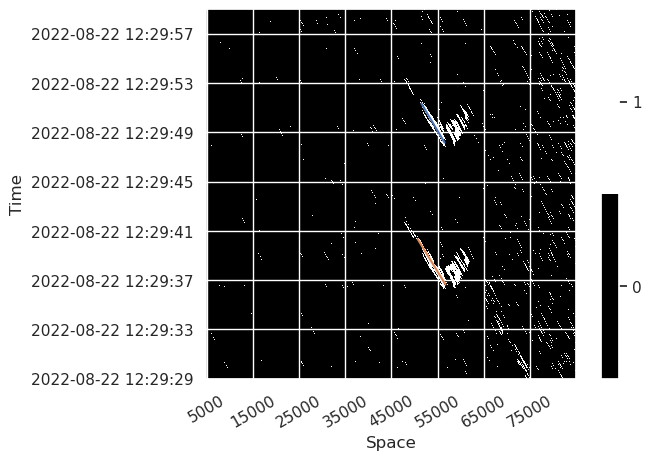

In [10]:
das.heatmap(xticks_rotate=30)

In [11]:
das.lines_df

,speed_kmh,speed_ms,s,t,s1,t1,s2,t2,s1_edge,t1_edge,...,x1,y1,x2,y2,x1_edge,y1_edge,x2_edge,y2_edge,y1_edge_ext,y2_edge_ext
0,-5696.202532,-1582.278481,-5000.0,3.16,56500.0,2022-08-22 12:29:48.160,51500.0,2022-08-22 12:29:51.320,84900.000000,2022-08-22 12:29:30.211200,...,515.0,479.0,465.0,558.0,799.000000,30.28,344.113924,749.0,1292.700000,30.28
1,-5869.565217,-1630.434783,-6000.0,3.68,56700.0,2022-08-22 12:29:36.640,50700.0,2022-08-22 12:29:40.320,69156.521739,2022-08-22 12:29:29.000000,...,517.0,191.0,457.0,283.0,641.565217,0.00,153.086957,749.0,983.733333,-241.40
